# EDA and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Examine csv files

In [2]:
links = pd.read_csv('data/links.csv')
display(links.head())
print(links.shape)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


(9742, 3)


In [3]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [4]:
movies = pd.read_csv('data/movies.csv')
display(movies.head())
print(movies.shape)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


(9742, 3)


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [7]:
ratings = pd.read_csv('data/ratings.csv')
display(ratings.head())
print(ratings.shape)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


(100836, 4)


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [10]:
tags = pd.read_csv('data/tags.csv')
display(tags.head())
print(tags.shape)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


(3683, 4)


In [11]:
tags.nunique()

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


### Address duplicates

In [13]:
movies[movies.duplicated(subset='title', keep=False)]

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


Checking the MovieLens website confirms that there were two unique "Emma" movies made in 1996 and two unique "War of the Worlds" movies in 2005. The other duplicates are true duplicates.

In [14]:
# drop least informative movie entry for true duplicates. keep entries with the most genre information.

unwanted = [168358, 6003, 32600]
indices = []
for idx, row in movies.iterrows():
    if row['movieId'] in unwanted:
        indices.append(idx)

movies.drop(index=indices, inplace=True)

movies[movies.duplicated(subset='title', keep=False)]

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [15]:
# replace movie ids in tags and ratings data

new = [2851, 144606, 147002]

tags['movieId'] = tags['movieId'].replace(unwanted, new)
ratings['movieId'] = ratings['movieId'].replace(unwanted, new)

In [16]:
movies.to_csv('data/movies_cleaned.csv')
tags.to_csv('data/tags_cleaned.csv')
ratings.to_csv('data/ratings_cleaned.csv')

### EDA

#### Ratings distribution

In [17]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [18]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19455.406988,3.501557,1.205946e+09
std,182.618491,35562.577975,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8132.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [19]:
sns.set(rc={'axes.facecolor':'#dcf0d6'})
sns.set_context('talk', font_scale=0.85)

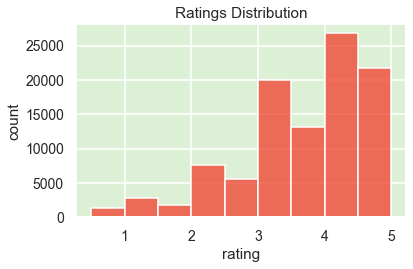

In [20]:
sns.histplot(x=ratings['rating'], data=ratings, binwidth=0.5, bins=10, color='#f13f2c')
plt.title('Ratings Distribution')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('images/rating-hist.png');

#### Rating count distribution

In [21]:
rating_counts = ratings.groupby('userId').count().reset_index()

In [22]:
rating_counts.describe()

,userId,movieId,rating,timestamp
count,610.000000,610.000000,610.000000,610.000000
mean,305.500000,165.304918,165.304918,165.304918
std,176.236111,269.480584,269.480584,269.480584
min,1.000000,20.000000,20.000000,20.000000
25%,153.250000,35.000000,35.000000,35.000000
50%,305.500000,70.500000,70.500000,70.500000
75%,457.750000,168.000000,168.000000,168.000000
max,610.000000,2698.000000,2698.000000,2698.000000


The userIds on file start at 1 and go up to 610. There are 610 unique users in the dataset. New users added to the database should have IDs 611 and higher. The least number of films rated for a single user is 20, while the most ratings per user is 2898. High rating counts could be do to more engagement or age of the user's account.

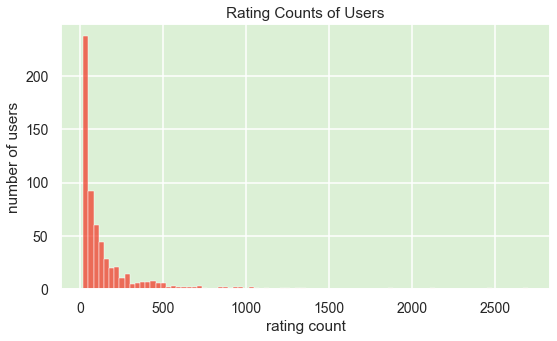

In [23]:
fig = plt.figure(figsize=(8,5))
sns.histplot(x='rating', data=rating_counts, color='#f13f2c')
plt.title('Rating Counts of Users')
plt.ylabel('number of users')
plt.xlabel('rating count')
plt.tight_layout()
plt.savefig('images/rating-count-hist.png');

In [24]:
ratings_med = ratings.groupby('userId').median().reset_index()
ratingcount_rating = pd.merge(ratings_med, rating_counts, on='userId')
ratingcount_rating.head()

,userId,movieId_x,rating_x,timestamp_x,movieId_y,rating_y,timestamp_y
0,1,1960.5,5.0,9.649824e+08,232,232,232
1,2,79132.0,4.0,1.445715e+09,29,29,29
2,3,2288.0,0.5,1.306464e+09,39,39,39
3,4,1733.5,4.0,9.645395e+08,216,216,216
4,5,346.5,4.0,8.474351e+08,44,44,44


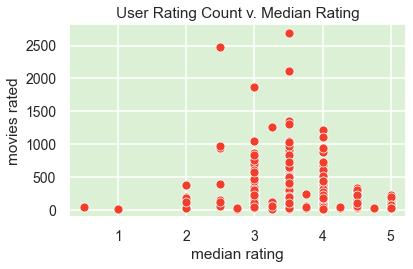

In [25]:
sns.scatterplot(x='rating_x', y='rating_y', data=ratingcount_rating, color='#f13f2c')
plt.title('User Rating Count v. Median Rating')
plt.xlabel('median rating')
plt.ylabel('movies rated')
plt.tight_layout()
plt.savefig('images/ratingcount-medrating.png');

#### Genre distribution of films

In [26]:
movies['genres'] = movies['genres'].apply(lambda x: x.replace('|', ',').lower() if x else x)
movies['genres'] = movies['genres'].replace('(no genres listed)', 'no genres listed')
movies['genres_list'] = movies['genres'].apply(lambda x: x.split(','))
movies.head()

,movieId,title,genres,genres_list
0,1,Toy Story (1995),"adventure,animation,children,comedy,fantasy","[adventure, animation, children, comedy, fantasy]"
1,2,Jumanji (1995),"adventure,children,fantasy","[adventure, children, fantasy]"
2,3,Grumpier Old Men (1995),"comedy,romance","[comedy, romance]"
3,4,Waiting to Exhale (1995),"comedy,drama,romance","[comedy, drama, romance]"
4,5,Father of the Bride Part II (1995),comedy,[comedy]


In [27]:
# Get counts of genres in dataset, in descending order

all_genres = set()
for genres in movies['genres_list']:
    if genres:
        all_genres.update(genres)
all_genres

{'action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'film-noir',
 'horror',
 'imax',
 'musical',
 'mystery',
 'no genres listed',
 'romance',
 'sci-fi',
 'thriller',
 'war',
 'western'}

In [28]:
genre_counts = {}
for i in list(all_genres):
    genre_counts[i] = 0

for _, row in movies.iterrows():
    if row['genres_list']:
        for genre in row['genres_list']:
            genre_counts[genre] +=1
            
genre_counts_sorted = dict(sorted(genre_counts.items(), key = lambda x: x[1], reverse=True))
genre_counts_sorted

{'drama': 4359,
 'comedy': 3755,
 'thriller': 1892,
 'action': 1828,
 'romance': 1596,
 'adventure': 1263,
 'crime': 1198,
 'sci-fi': 979,
 'horror': 978,
 'fantasy': 779,
 'children': 664,
 'animation': 611,
 'mystery': 573,
 'documentary': 440,
 'war': 382,
 'musical': 334,
 'western': 167,
 'imax': 158,
 'film-noir': 87,
 'no genres listed': 34}

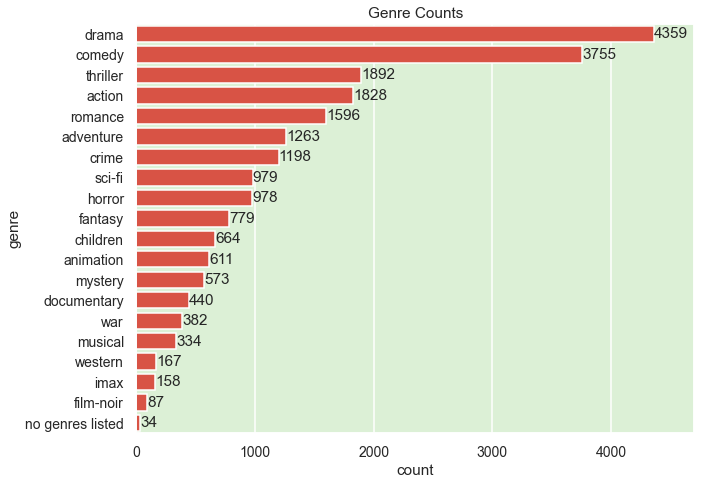

In [29]:
# What is the distribution of film genres in this database?

fig = plt.figure(figsize=(10,7))
ax = sns.barplot(x=list(genre_counts_sorted.values()), y=list(genre_counts_sorted.keys()), color='#f13f2c')
plt.title('Genre Counts')
plt.ylabel('genre')
plt.xlabel('count')
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
plt.xlim(0,4700)
plt.tight_layout()
plt.savefig('images/genrecounts.png');

#### Most common tags

In [30]:
tags_sorted = tags.tag.value_counts().reset_index()
tags_sorted.rename(columns={'index':'tag', 'tag':'count'}, inplace=True)
tags_sorted

,tag,count
0,In Netflix queue,131
1,atmospheric,36
2,superhero,24
3,thought-provoking,24
4,surreal,23
...,...,...
1584,Jennifer Lawrence,1
1585,asylum,1
1586,Journalism,1
1587,action choreography,1


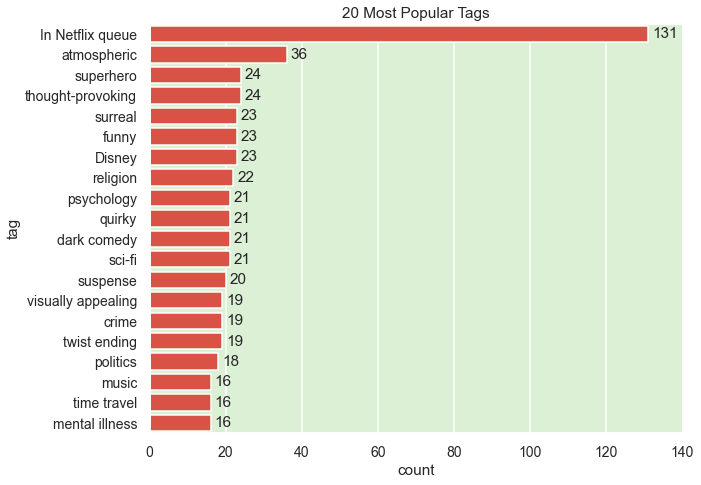

In [31]:
fig = plt.figure(figsize=(10,7))
ax = sns.barplot(y='tag', x='count', data=tags_sorted[:20], color='#f13f2c')
#plt.xticks(rotation=90)
plt.title('20 Most Popular Tags')
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
plt.xlim(0,140)
plt.tight_layout()
plt.savefig('images/populartags.png');

#### Percent of users who tag films

In [32]:
print('Num users who tag')
print(tags.userId.nunique())
print('\nValue Counts')
print(tags.userId.value_counts().head(20))
print('\nNum users who rate')
print(ratings.userId.nunique())

Num users who tag
58

Value Counts
474    1507
567     432
62      370
599     323
477     280
424     273
537     100
125      48
357      45
318      41
184      35
573      31
193      20
18       16
119      14
336      10
2         9
305       8
606       7
327       7
Name: userId, dtype: int64

Num users who rate
610


In [33]:
# any users who have tagged who have not rated?

np.setdiff1d(list(set(tags.userId)), list(set(ratings.userId)))

array([], dtype=int64)

In [34]:
print('Percent of users who tag films: {}%'.format(round((58/610)*100, 2)))

Percent of users who tag films: 9.51%


All users who have tagged films have also rated films. The percentage of users (out of total users) who tag films is ~9.51%

In [35]:
ratings_tags = pd.merge(ratings, tags, how='left', on='userId')

In [36]:
ratings_tags['has_tagged'] = ratings_tags.apply(lambda row: 'no' if pd.isnull(row['tag']) else 'yes', axis=1)
ratings_tags.head()

,userId,movieId_x,rating,timestamp_x,movieId_y,tag,timestamp_y,has_tagged
0,1,1,4.0,964982703,NaN,NaN,NaN,no
1,1,3,4.0,964981247,NaN,NaN,NaN,no
2,1,6,4.0,964982224,NaN,NaN,NaN,no
3,1,47,5.0,964983815,NaN,NaN,NaN,no
4,1,50,5.0,964982931,NaN,NaN,NaN,no


<AxesSubplot:xlabel='has_tagged', ylabel='rating'>

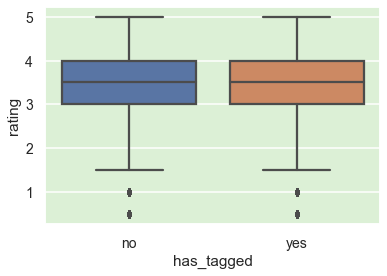

In [37]:
sns.boxplot(y='rating', x='has_tagged', data=ratings_tags)

Users who have tagged films have the same rating distributions as those who have not tagged films. One group does not seem to rate more highly/generously than the other. 

### NLP Pre-processing

#### Get word vectors

In [38]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [39]:
tags_combined = tags.groupby(['movieId'])['tag'].apply(lambda x: ' '.join(x)).reset_index()
tags_combined.head()

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


In [40]:
movies_tags = pd.merge(movies, tags_combined, how='left', on='movieId')
movies_tags = movies_tags.drop('genres_list', axis=1)
movies_tags['genres'] = movies_tags['genres'].apply(lambda x: x.replace(',', ' '))
movies_tags.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),adventure animation children comedy fantasy,pixar pixar fun
1,2,Jumanji (1995),adventure children fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),comedy romance,moldy old
3,4,Waiting to Exhale (1995),comedy drama romance,NaN
4,5,Father of the Bride Part II (1995),comedy,pregnancy remake


In [41]:
movies_tags['bow'] = movies_tags['genres'] + ' ' + movies_tags['tag'].fillna('')
movies_tags.head()

,movieId,title,genres,tag,bow
0,1,Toy Story (1995),adventure animation children comedy fantasy,pixar pixar fun,adventure animation children comedy fantasy pi...
1,2,Jumanji (1995),adventure children fantasy,fantasy magic board game Robin Williams game,adventure children fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),comedy romance,moldy old,comedy romance moldy old
3,4,Waiting to Exhale (1995),comedy drama romance,NaN,comedy drama romance
4,5,Father of the Bride Part II (1995),comedy,pregnancy remake,comedy pregnancy remake


In [42]:
item_content = movies_tags.drop(['title', 'genres', 'tag'], axis=1)
item_content['bow'] = item_content['bow'].str.lower()
item_content.set_index('movieId', inplace=True)
item_content.head()

,bow
movieId,
1,adventure animation children comedy fantasy pi...
2,adventure children fantasy fantasy magic board...
3,comedy romance moldy old
4,comedy drama romance
5,comedy pregnancy remake


### Content-based recommender test run

In [43]:
item_content.to_csv('data/item_content.csv')

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [45]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(item_content['bow'])

cosine_sim = cosine_similarity(tfidf_matrix)
print(cosine_sim)

[[1.         0.08806834 0.01349231 ... 0.         0.15083694 0.09576975]
 [0.08806834 1.         0.         ... 0.         0.         0.        ]
 [0.01349231 0.         1.         ... 0.         0.         0.14088282]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.15083694 0.         0.         ... 0.         1.         0.        ]
 [0.09576975 0.         0.14088282 ... 0.         0.         1.        ]]


In [46]:
# Series containing titles
indices = pd.Series(movies_tags['title'])

def recommendations(title, cosine_sim=cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    scores = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    top_10_indexes = list(scores.iloc[0:11].index)
    for i in top_10_indexes:
        recommended_movies.append(indices[i])
    return recommended_movies

In [47]:
indices.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [48]:
recommendations('Toy Story (1995)')

['Toy Story (1995)',
 "Bug's Life, A (1998)",
 'Toy Story 2 (1999)',
 'Guardians of the Galaxy 2 (2017)',
 'Monsters, Inc. (2001)',
 'Turbo (2013)',
 "Emperor's New Groove, The (2000)",
 'The Good Dinosaur (2015)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 'Wild, The (2006)',
 'Shrek the Third (2007)']

In [49]:
recommendations('Powder (1995)')

['Into the Forest (2015)',
 'SORI: Voice from the Heart (2016)',
 'Metropolis (1927)',
 'Electroma (2006)',
 'Charly (1968)',
 'Midnight Special (2015)',
 'Harrison Bergeron (1995)',
 'Man from Earth, The (2007)',
 'Giver, The (2014)',
 'Last Night (1998)',
 'I Origins (2014)']

In [50]:
recommendations('American Psycho (2000)')

['Saw VI (2009)',
 "Bird with the Crystal Plumage, The (Uccello dalle piume di cristallo, L') (1970)",
 'American Psycho (2000)',
 'Book of Shadows: Blair Witch 2 (2000)',
 'Testament of Dr. Mabuse, The (Das Testament des Dr. Mabuse) (1933)',
 'From Hell (2001)',
 'House of Wax (1953)',
 'American Psycho II: All American Girl (2002)',
 'Mindhunters (2004)',
 'Opera (1987)',
 'I Still Know What You Did Last Summer (1998)']

"American Psycho" is third on the list when one would expect it to be first (American Psycho should be most similar to itself). "Powder (1995)" does not even appear in the returned list. Time to investigate why this could be. 

In [58]:
movies_tags[movies_tags['title']== 'Toy Story (1995)']

,movieId,title,genres,tag,bow
0,1,Toy Story (1995),adventure animation children comedy fantasy,pixar pixar fun,adventure animation children comedy fantasy pi...


Toy Story had descriptive tags

In [52]:
# Examine bow for American Psycho and related

movies_tags[movies_tags['title'] == 'American Psycho (2000)']

,movieId,title,genres,tag,bow
2641,3535,American Psycho (2000),crime horror mystery thriller,NaN,crime horror mystery thriller


In [53]:
movies_tags[movies_tags['title'] == 'Saw VI (2009)']

,movieId,title,genres,tag,bow
7171,72129,Saw VI (2009),crime horror mystery thriller,NaN,crime horror mystery thriller


In [54]:
movies_tags[movies_tags['title'] == "Bird with the Crystal Plumage, The (Uccello dalle piume di cristallo, L') (1970)"]

,movieId,title,genres,tag,bow
6070,41014,"Bird with the Crystal Plumage, The (Uccello da...",crime horror mystery thriller,NaN,crime horror mystery thriller


In [55]:
movies_tags[movies_tags['title'] == 'Book of Shadows: Blair Witch 2 (2000)']

,movieId,title,genres,tag,bow
2964,3973,Book of Shadows: Blair Witch 2 (2000),crime horror mystery thriller,NaN,crime horror mystery thriller


In [56]:
# examine bow for Powder and related

movies_tags[movies_tags['title']== 'Powder (1995)']

,movieId,title,genres,tag,bow
23,24,Powder (1995),drama sci-fi,NaN,drama sci-fi


In [57]:
movies_tags[movies_tags['title'] == 'SORI: Voice from the Heart (2016)']

,movieId,title,genres,tag,bow
9282,158027,SORI: Voice from the Heart (2016),drama sci-fi,NaN,drama sci-fi


"American Psycho" and the films that come before it in the sorted list have identical bags of words and therefore have the same similarity score. Films with identical bags of words will have cosine_sim = 1 and there will be no real order amongst them. The films related to "Powder" have bags of words that contain only "drama sci-fi." This content-based recommender will do best on films with more descriptive text information (more tags from users). Otherwise, it is only finding similarities based on genre information. Adding plot synopses should also greatly improve the specificity of these recommendations.